<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

# AST4310 2024, Project 1


</div>

Authored by candidate 11 and 6.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from astropy.visualization import quantity_support
from astropy import units, constants
from scipy.integrate import cumulative_trapezoid
from atoms import Atom 
from read_nist import read_NIST_species

# Plot defaults and quantity supportS
from astropy.visualization import quantity_support
quantity_support();

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Exercise 1: Line formation in optically thick medium [30 points]
    
Assume an optically thick medium, where the Eddington-Barbier approximation is valid. A didactic tool to understand the formation of spectral lines is a diagram with four panels: total extinction vs. frequency (top left), optical depth vs height (top right), source function vs. height (bottom right), and emerging intensity vs. frequency (bottom left). It is also useful to plot the optical depth at two frequency points: near the maximum extinction and near the minimum extinction. 
    
In this exercise, you are to create such diagrams and explain in physical terms what is going on. The units are not important for these purposes, so feel free to use arbitrary units. You are free to create your own function for $\alpha(\nu)$ (extinction as a function of frequency), but keep in mind that spectral lines usually follow a Gaussian shape (or, more precisely, Voigt profile), and continua can usually be approximated by a line (for narrow wavelength regions). You are also free to select your own function for $S(h)$ (source function as a function of height). It is recommended that you do not set the extinction such that $\tau=1$ is reached at the edges of your height scale - some approximations will break down and strange things will follow. Assume that the extinction is the same at all height points (unrealistic, but simple for now).
    
* *[10 points]* Build $\alpha(\nu)$ and $S(h)$ such that the emergent intensity looks approximately like the plot below. Plot the 4-panel diagram and explain in physical terms the choices you made when building the extinction and source function. Would there be more than one way to build $\alpha$ and $S$ so that the resulting intensity would be the same?


<img src="https://tiagopereira.space/ast4310/images/intensity_plot1.svg" alt="Spectrum 1" width="400"/>

* *[10 points]* Build $\alpha(\nu)$ and $S(h)$ such that the emergent intensity looks approximately like the plot below. Plot the 4-panel diagram and explain in physical terms the choices you made when building the extinction and source function. Would there be more than one way to build $\alpha$ and $S$ so that the resulting intensity would be the same?
    
<img src="https://tiagopereira.space/ast4310/images/intensity_plot2.svg" alt="Spectrum 2" width="400"/>
    
* *[10 points]* Build $\alpha(\nu)$ and $S(h)$ such that you have a spectral line in absorption. Plot a modified version of the 4-panel diagram where in the intensity plot you have both $I(\mu=1)$ and $I(\mu=0.3)$. Explain the differences between $I(\mu=1)$ and $I(\mu=0.3)$ using the information from the diagram.
    
</div>

## Creating intensity plots

To make an intensity plot resembling the one above we start by defining a function to plot a 4-panel diagram. This is the same function that we used in the group session but we have added an option of defining tau and the intensity outside of the function and added more markers to the plots.

In [2]:
def four_panel_diagram(freq, height, source_function, extinction, tau): 
    if tau is None:
        tau = cumulative_trapezoid(extinction, -height, axis = 0, initial = 0) # compute optical depth at all heights
 
    intensity = np.trapz(source_function[:, np.newaxis]*np.exp(-tau), tau, axis = 0) # compute intensity at the top of the surface

    %config InLineBackend.figure_formats = ['svg']

    fig, ax = plt.subplots(2,2,figsize = (10, 7))
    ax[0, 0].plot(freq, extinction[0])
    ax[0,0].plot([freq[0]], [extinction[0, 0].value], 'bo', ms = 7)
    ax[0,0].plot([freq[50]], [extinction[0, 50].value], 'ro', ms = 7)
    ax[0,0].plot([freq[37]], [extinction[0, 37].value], 'go', ms = 7)
    ax[0,0].plot([freq[77]], [extinction[0, 77].value], 'co', ms = 7)
    ax[0,0].plot([freq[-1]], [extinction[0, -1].value], 'mo', ms = 7)
    ax[0,0].set_xlabel('Frequency'), ax[0,0].set_ylabel(r'Extinction [m$^{-1}$]') 
    ax[0,0].set_title('Extinction')

    ax[0,1].plot(height, tau[:, 0], 'b-')
    ax[0,1].plot(height, tau[:, 50], 'r-')
    ax[0,1].plot(height, tau[:, 37], 'g-')
    ax[0,1].plot(height, tau[:, 77], 'c-')
    ax[0,1].plot(height, tau[:, -1], 'm-')
    tau1_0 = np.argmin(np.abs(tau[:, 0] - 1))
    tau1_50 = np.argmin(np.abs(tau[:, 50] - 1.0))
    tau1_37 = np.argmin(np.abs(tau[:, 37] - 1.0))
    tau1_77 = np.argmin(np.abs(tau[:, 77] - 1.0))
    tau1_last = np.argmin(np.abs(tau[:, -1] - 1.0))
    ax[0, 1].plot([height[tau1_0].value], 1, 'bo')
    ax[0, 1].plot([height[tau1_50].value], 1, 'ro')
    ax[0, 1].plot([height[tau1_37].value], 1, 'go')
    ax[0, 1].plot([height[tau1_77].value], 1, 'co')
    ax[0, 1].plot([height[tau1_last].value], 1, 'mo')
    ax[0, 1].set_xlabel('Height [km]')
    ax[0,1].set_title('Optical depth')

    ax[1, 1].plot(height, source_function)
    ax[1, 1].plot(height[tau1_0], source_function[tau1_0], 'bo', ms = 7)
    ax[1, 1].plot(height[tau1_50], source_function[tau1_50], 'ro', ms = 7)
    ax[1, 1].plot(height[tau1_37], source_function[tau1_37], 'go', ms = 7)
    ax[1, 1].plot(height[tau1_77], source_function[tau1_77], 'co', ms = 7)
    ax[1, 1].plot(height[tau1_last], source_function[tau1_last], 'mo', ms = 7)
    ax[1, 1].set_xlabel('Height [km]'); ax[1, 1].set_ylabel(r'$S_\nu$ [kW m$^{-2}$ nm$^{-1}$ sr$^{-1}$]')
    ax[1, 1].set_title('Source function')

    #intensity = np.trapz(source_function[:, np.newaxis]*np.exp(-tau), tau, axis = 0) # compute intensity at the top of the surface
    ax[1, 0].plot(freq, intensity)
    ax[1, 0].plot(freq[0], intensity[0], 'bo', ms = 7)
    ax[1, 0].plot(freq[50], intensity[50], 'ro', ms = 7)
    ax[1, 0].plot(freq[37], intensity[37], 'go', ms = 7)
    ax[1, 0].plot(freq[77], intensity[77], 'co', ms = 7)
    ax[1, 0].plot(freq[-1], intensity[-1], 'mo', ms = 7)
    ax[1, 0].set_title('Intensity')
    ax[1, 0].set_xlabel('Frequency'); ax[1, 0].set_ylabel(r'Intensity [kW m$^{-2}$ nm$^{-1}$ sr$^{-1}$]')

    plt.tight_layout()
    plt.show()

### First intensity plot

To get a better understanding of the relation between the four panels we add some more markers to the plots. The blue dot shows where we have minimum extinction and the red dot shows where we have maximum extinction. The corresponding blue line in the optical depth panel shows the optical depth where we have minimum extinction and the red line shows the optical depth where we have maximum extinction. We start by defining the frequency and extinction.

In [3]:
freq = np.linspace(-5, 5, 101)
extinction1 = (np.exp(- freq ** 2) + 0.1 * freq / 50 + 0.1) / units.m / 700
# extinction = (np.exp(- freq ** 2) + 0.5 * freq / 50 + 0.1) / units.m / 100
#extinction = (np.exp(- freq ** 2) + 0.5 * freq / 50 + 0.1) / units.m / 100

We chose to define the extinction with a linear term and a gaussian curve as spectral lines usually have a gaussian shape. The gaussian curve we defined has $\sigma = 1$ and it is centered around 0. We then define the optical depth and height with proper units:

In [4]:
depth = np.logspace(0, 4, 200) * units.km
height = -depth + depth.max()

i_units = units.Quantity(1, "kW m-2 nm-1 sr-1") # intensity units

In [5]:
# build the source function
source_function1 = (- 2 * np.sin(depth.value / 2.4e3) +  2 * np.exp(depth.value / 9e3)) * i_units # source function 1, linear
#source_function1 = (depth) / 100 * i_units # source function 1, linear

# build the extinction 
extinction1 = np.tile(extinction1, ((len(depth)), 1))

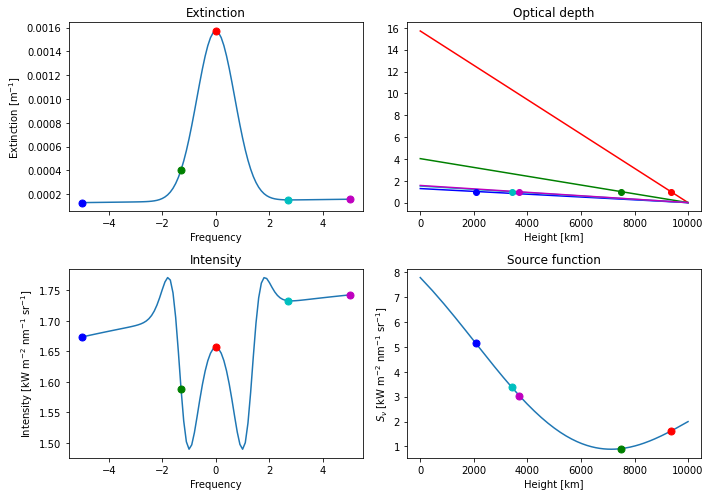

In [6]:
## ACTUALLY TESTING THE FUNCTION
four_panel_diagram(freq, height, source_function1, extinction1, tau=None)

We try to change different variables and we start by changing the sign of the linear term in the extinction. We see that this causes the linear part of the  extinction-plot and intensity-plot to shift from increasing to decreasing or the other way. We see that when the linear part of the extinction-plot is increasing, the intensity-plot has a decreasing linear part. We want the intensity to have a slightly increasing linear part so we make the linear term in the extinction positive.


From previous 4-panel diagrams that we have studied in the lectures and group sessions we have seen that if the source function decreases, we will have an absorption line. Since we want a spectral line that looks like an absorption line, but with increased intensity in the middel part, we are looking for a source function that decreases, but then increases again. We found that a combination of a sine function and an exponential gave us this shape of the source function. We scale the depth value in the sine expression to not have the source function oscillating several times.

From here we tweaked the parameters to resemble the figure as much as possible. We do however notice that we no longer get the relation we expect (from the Eddington-Barbier relation) for the values between the source function panel and the intensity panel. We would expect that the dots are placed such that the y-values of the dots position in the source function panel matches the y-values of the dots position in the intensity panel. We see that this is no longer the case and it seems like this is due to us dividing the extinction by 700 instead of 100 and therefore scaling the extinction. We do however still see the expected correlation between the height position of the dots in the optical depth panel and source function panel.

### Second intensity plot:

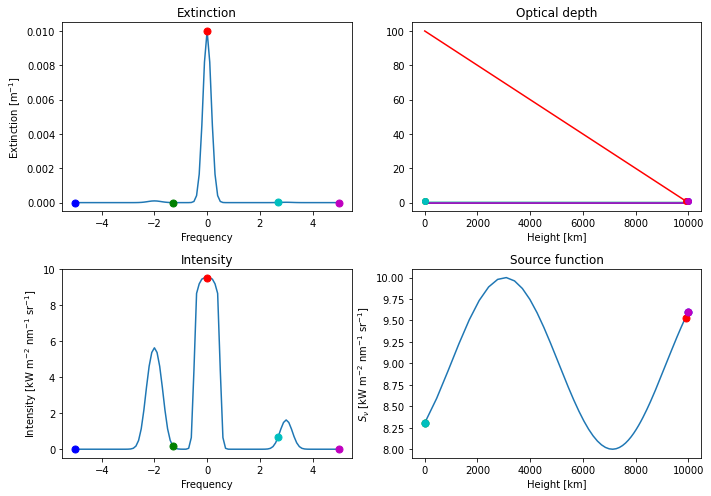

In [7]:
"""extinction = (5 * np.exp(- freq ** 2) + 4 * np.exp(- 5 * (freq + 3) ** 2) + np.exp(- (freq - 1) ** 2)) / units.m 

extinction2 = np.tile(extinction, ((len(depth)), 1))
source_function2 = (0.01 * np.log10(depth.value)**4 + 0.4*  np.log10(depth.value)**3 + 0.5 * np.log10(depth.value)**2 + 0.1 * np.log10(depth.value) + 50)* i_units
"""

# build the source function
#source_function2 = (depth.value**4 - 20 * depth.value) * i_units # source function 1, linear
source_function2 = (np.sin(depth.value/1.3e3 + 2.5) + 9) * i_units 

# build the extinction 8
#extinction2 = (np.exp(- 3 * freq**2) + 0.2 * np.exp(-1.5 * (freq - 3)**2) + 0.7 * np.exp(- 7 * (freq + 2)**2)) / units.m / 100
#extinction2 = np.tile(extinction2, ((len(depth)), 1))

extinction2 = (np.exp(- 20 * freq ** 2) + 0.002 * np.exp(- 10 * (freq - 3) ** 2) + 0.01 * np.exp(- 8 * (freq + 2) ** 2)) / units.m / 100
extinction2 = np.tile(extinction2, ((len(depth)), 1))

four_panel_diagram(freq, height, source_function2, extinction2, tau=None)

We first see that the in the intensity plot we want to recreate, there is no linear term in the extinction so we removed it. Then we tried to think about how the source function must look like and we assumed that it had to first increase, then decrease and then increase again. This did however not give us the intensity plot we wanted when the extinction was defined as only a gaussian. We then tried to make the extinction consist of three gaussian curves centered around -2, 0 and 3 as in the figure we are given and scaled them accordingly. This seemed to work.

### Absorption line:
We now want to study an absorption line and how different values of $\mu$ change the intensity. We know that $\mu = \cos(\theta)$ where $\theta$ is the angle between the ray and the local normal. If $\theta = 0$, then $\mu = 1$ and we the ... If $\mu < 1$ for a small change in height we get a large change of optical depth from the relation $d \tau_{\nu} = - \alpha_{\nu} dz / \mu$??

(2, 101)


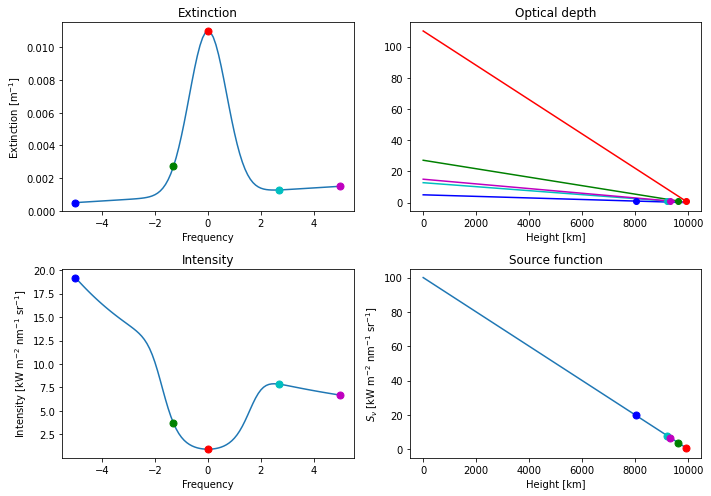

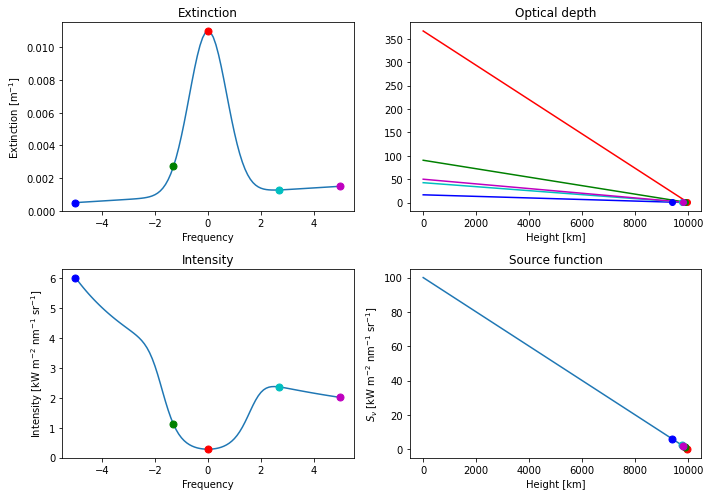

In [8]:
# Make new tau and mu=1 for extinction /1 and for mu=0.3 divide by 0.3 

source_function3 = (depth.value) / 100 * i_units # source function 1, linear
extinction3 = (np.exp(- freq ** 2) + 0.5 * freq / 50 + 0.1) / units.m / 100
extinction3 = np.tile(extinction3, ((len(depth)), 1))

tau = cumulative_trapezoid(extinction3, -height, axis = 0, initial = 0) # compute optical depth at all heights
intensity = np.trapz(source_function3[:, np.newaxis]*np.exp(-tau), tau, axis = 0) # compute intensity at the top of the surface
intensity1 = np.trapz(source_function3[:, np.newaxis]*np.exp(-tau), tau, axis = 0) # compute intensity at the top of the surface
list = [intensity, intensity1]
print(np.shape(list))

four_panel_diagram(freq, height, source_function3, extinction3, tau)
four_panel_diagram(freq, height, source_function3, extinction3, tau/0.3)


We see that with a lower value of $\mu$ the intensity decreases.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Exercise 2: The Boltzmann and Saha laws [21 points]
    
An effective temperature around 9500 K is the classical divide between hot and cool stars, since it is approximately the temperature where hydrogen is 50% ionised. Hot stars have therefore mostly ionised hydrogen, and cool stars mostly neutral hydrogen.
    
* *[7 points]* Discuss what possible implications to the spectra of stars that come with hydrogen being ionised or neutral. 
* *[7 points]* Assuming that the Saha distribution can be applied, estimate what is the typical electron density in a star with effective temperature of 9500 K and a hydrogen ionisation fraction of 50%.
* *[7 points]* For the electron density you obtained before, plot the neutral fraction of hydrogen as a function of temperature.
    
</div>

## Ionized vs neutral hydrogen

Something about fewer hydrogen spectral lines for ionized hydrogen.

## Typical electron density

We assume that the Saha distribution given by
$$
\left[\frac{N_{r + 1}}{N_r}\right]^{\text{TE}}N_e = \frac{2U_{r + 1}}{U_r}\left(\frac{2\pi m_e k T}{h^2} \right)^{3/2} e^{-\chi_r / k T}
$$
can be applied. We want to estimate the typical electron density in a star with an effective temperature of 9500 K and a hydrogen ionisation fraction of 50 %.

That the hydrogen ionisation fraction is 50 % means that $N_{r + 1} = 0.5$ and $N_r = 0.5$ where we let $N_{r+1}$ be the population of the first ionized stage and $N_r$ is the number of neutral atoms. We can then use the Saha distribution to find an expression for the electron density:
$$
N_e = \frac{2U_{r + 1}}{U_r}\left(\frac{2\pi m_e k T}{h^2} \right)^{3/2} e^{-\chi_r / k T}
$$

We use the atom class, given in `atoms.py` with temperature 9500 K as follows:

In [9]:
h_atom = Atom('H_atom.txt')

def electron_density(temperature):
    U0, U1 = h_atom.compute_partition_function(temperature) # partition function
    chi = h_atom.chi_ion[1] # ionization energy of hydrogen (might change to .chi_ion[1], but does no longer match with the formula..)
    saha_const = ((2 * np.pi * constants.m_e * constants.k_B * temperature) / (constants.h**2))**(3/2)
    N_e = (2 * U1/U0 * saha_const * np.exp(-chi / (constants.k_B*temperature))).to('m-3')
    return N_e


In [10]:
T = 9500 * units.K
N_e = electron_density(T)
N_e

<Quantity [1.36615772e+20] 1 / m3>

For a star with an effective temperature of 9500 K and a hydrogen ionization factor of 0.5, we estimate a typical electron density of $1.37\cdot 10^{20} \text{ m}^{-3}$. 
Given this electron density, we want to plot the neutral fraction of hydrogen as a function of temperture. To do that, $\texttt{Atom}$ class require the electron pressure. For that we use the following relation
$$
P_e = N_e k T
$$

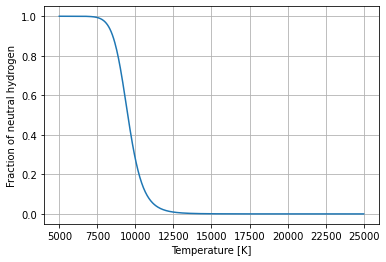

In [16]:
P_e = (N_e * constants.k_B * T).to('Pa')
temperatures = np.linspace(5000, 25000, 500) * units.K
neutral_frac = h_atom.compute_ionisation(temperatures, P_e)[0] # neutral fraction of hydrogen
plt.plot(temperatures, neutral_frac)
plt.ylabel("Fraction of neutral hydrogen")
plt.xlabel("Temperature [K]")
plt.grid()
plt.show()

We see here that as the temperature increases, the neutral fraction of hydrogen decreases, as we would expect because the atoms becomes ionized. We also added a grid such that we easier see that at temperature 9500 K, the fraction of neutral hydrogen is 0.5.

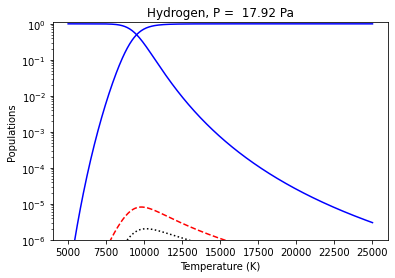

In [87]:
P_e = (N_e * constants.k_B * T).to('Pa')
temperatures = np.linspace(5000, 25000, 500) * units.K
h_atom.plot_payne(temperatures, P_e)
plt.title(f'Hydrogen, P = {P_e[0]: .2f}');

In this figure, the blue solid line show the hydrogen population at each ionization stage. Here we look at neutral hydrogen (HI) and hydrogen ionized once (H II). The red dashedlines show the first excited state for the ionization stage and the black dotted line show the second excited state for the ionization stage.
The intersection between the population of H I and H II occur at around 10 000 K, which is similar to the effective temperature on the Sun required to ionize hydrogen.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

### Exercise 3: Carbon [44 points]

Carbon is an element essential to life on Earth. It is the fourth most abundant element in the Universe (after hydrogen, helium, and oxygen), and in the colder regions of the Sun and solar system, it easily forms molecules, most commonly in the form of hydrocarbonates. In astrophysics, molecules such as CO can be used to trace star formation in distant galaxies, and carbon lines are important diagnostics of temperature in stars. For example, the ultraviolet C II lines with wavelengths of 133.4532 nm, 133.5663 nm, and 133.5708 nm can be used to detect if a star has a chromosphere (a hot layer around its surface). In the Sun, these lines are also routinely observed by NASA's [Interface Region Imaging Spectrograph](https://science.nasa.gov/mission/iris/) (IRIS) mission, where they are used to trace the dynamics and energetics of the solar chromosphere. 

The provided file `CI-III.txt` contains the energy levels of neutral and singly-ionised C, plus the ionisation energy of doubly-ionised C (C III). Use this file to answer this exercise.
    
* *[7 points]* In the CI-III.txt file, identify the level energies and statistical weights of the lower and upper levels of the C II lines at 133.4532 nm and 133.5663 nm. The 133.4532 nm line is a resonance line, and both lines share the same upper level. 
* *[8 points]* Assuming Saha-Boltzmann statistics and an electron pressure of 1 kPa, what is the range of temperatures where C is mostly in the singly ionised form? Compare with hydrogen and discuss.
* *[10 points]* Making use of the [NIST Atomic Spectra Database Levels form](https://physics.nist.gov/PhysRefData/ASD/levels_form.html), extend the C atom file to include all ionisation stages up to (and including) C VII. Make a modified "Payne plot" to show only the strength of the ionisation stages as function of temperature for this new model atom. Plot for an electron pressure of 1 kPa and a range of temperatures between $3500$ and $10^7$ K.
* *[9 points]* In diffuse media where densities are much lower, collisions are much less frequent and the Saha ionisation no longer applies. In these conditions, it is common to use the *Collisional Ionisation Equilibrium* (CIE), also called *coronal equilibrium* since it is a good approximation for the coronae of stars. The provided file `C_CIE.txt` contains the ionisation fractions of carbon (up to C VII) as a function of temperature. Compare the ionisation fractions under CIE with the Saha (previous point) and discuss the differences. Which approximation is best on the surface of the Sun?
* *[10 points]* Under Collisional Ionisation Equilibrium, a bound-free transition can cool a gas, but the same is not true under Saha ionisation. Why is this? Discuss.



## Identifying the level energies and statistical weights:
To find the level energies and statistical weights of the lower and upper levels of the C II lines at 133.4531 nm and 133.5663 nm we need to find the difference between two levels that gives these wavelengths and which levels this corresponds to.

In [10]:
c_atom = Atom('C_I-III.txt')
thr = 1e-4 * units.nm # threshold
wavelengths = [133.4532, 133.5663] * units.nm

chi_CII = c_atom.chi[1] # level energies for first ionized stage
g_CII = c_atom.g[1]     # statistical weights for first ionized stage
levels = chi_CII.size   # 179 levels

transitions = []

for i in range(levels): # lower level
    for j in range(i+1, levels): # upper level
        energy_diff = chi_CII[j] - chi_CII[i]
        calc_wav = energy_diff.to('nm', equivalencies = units.spectral())
        
        if np.abs(calc_wav - wavelengths[0]) <= thr:
            transitions.append([calc_wav.value, i, j])
        if np.abs(calc_wav - wavelengths[1]) <= thr:
            transitions.append([calc_wav.value, i, j])

# print(transitions)
for transition in transitions:
    wav = transition[0]; lower_indx = transition[1]; upper_indx = transition[2]
    
    lower_E = chi_CII[lower_indx]
    upper_E = chi_CII[upper_indx]
    
    lower_g = g_CII[lower_indx]
    upper_g = g_CII[upper_indx]
    
    # Print as table instead?
    print(f"For the spectral line with wavelength {wav:.4f} nm we find the lower level to be level {lower_indx}")
    print(f"of the singly ionized stage with energy {lower_E:.3e} and statistical weight g = {lower_g}.")
    print(f"The upper level is level {upper_indx}, with energy {upper_E:.3e} and statistical weight g = {upper_g} \n")


c:\Users\rache\AppData\Local\Programs\Python\Python310\lib\site-packages\astropy\units\equivalencies.py:143: RuntimeWarning: divide by zero encountered in scalar divide
  (si.m, si.J, lambda x: hc / x),


For the spectral line with wavelength 133.4533 nm we find the lower level to be level 0
of the singly ionized stage with energy 0.000e+00 aJ and statistical weight g = 2.0.
The upper level is level 6, with energy 1.488e+00 aJ and statistical weight g = 4.0 

For the spectral line with wavelength 133.5663 nm we find the lower level to be level 1
of the singly ionized stage with energy 1.260e-03 aJ and statistical weight g = 4.0.
The upper level is level 6, with energy 1.488e+00 aJ and statistical weight g = 4.0 



Note that the level energies above are not relative to the ground level as .chi() automatically subtracts the ionization energy. It therefore makes sense that the first level, level 0, of the singly ionized stage has an energy of 0 aJ. As expected, we see that the resonance line has the lower level being the ground level for the first ionized stage, as this is a feature of resonance lines. We also see, as expected, that the two spectral lines have the same upper level which is the 6th level for the singly ionized stage. 

## Range of temperatures where C is mostly in singly ionized form:

We assume Saha-Boltzmann statistics and an electron pressure of 1 kPa. To find the range of temperatures where C is mostly in the singly ionized form we make a payne plot. We start with a wide range of temperatures and then zoom in to the temperature range which gives a good view of where carbon is in singly ionized form.

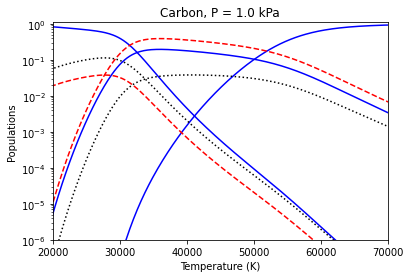

In [21]:
temperatures = np.linspace(5000, 100000, 500) * units.K
pressure = 1 * units.kPa
c_atom.plot_payne(temperatures, pressure)
plt.title(f'Carbon, P = {pressure}')
plt.xlim(20000, 70000); # zoom into area of interest

The blue lines show the population of atoms in the ground state of each ionization stage, the red lines show the first excited state in each ionization stage and the black dotted lines show the second excited state for each ionization stage. We see that the first blue line decreases as the temperature rises due to more atoms becoming ionized. The second blue line shows the population of singly ionized atoms, which is what we wanted to study in this question. We see that for P = 1.0 kPa, carbon is mostly singly ionized in the temperature range between 30000 K and 50000 K. 

To compare with hydrogen we make another payne plot, again starting with a wide temperature range and zooming in on the singly ionized part of the plot.

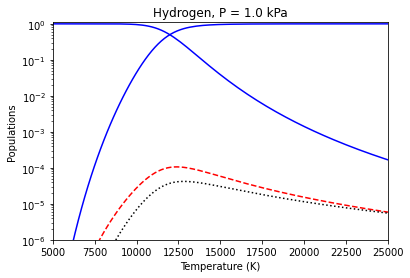

In [17]:
temperatures = np.linspace(5000, 100000, 500) * units.K
pressure = 1 * units.kPa
h_atom.plot_payne(temperatures, pressure)
plt.title(f'Hydrogen, P = {pressure}')
plt.xlim(5000, 25000); # zoom into area of interest

We see from the plot above that most of the hydrogen is singly ionized after about 13 000 K. This is at a much lower temperature than for carbon. WHY?  Another thing we notice is that the population of atoms in the first and second excited states are much higher for carbon compared to hydrogen, and in the singly ionized stage for carbon, more atoms are in the first excited state than in the ground state. WHY?


We can also compare this hydrogen plot to the one shown in exercise 2. We see that when we increase the pressure, as we did in this exercise, the curves seem to shift to the right and we need a higher temperature to ionize the atom.

## Strength of ionization stages as function of temperature:

We now use the NIST database to extend the C atom file to include all ionisation stages up to (and including) C VII. We wish now to make a modified "Payne plot" to show only the strength of the ionisation stages as function of temperature for this new model atom. We plot for an electron pressure of 1 kPa and a range of temperatures between $3500$ and $10^7$ K. We assume that the ionization stage strength is the sum of population over all levels in the given stages.

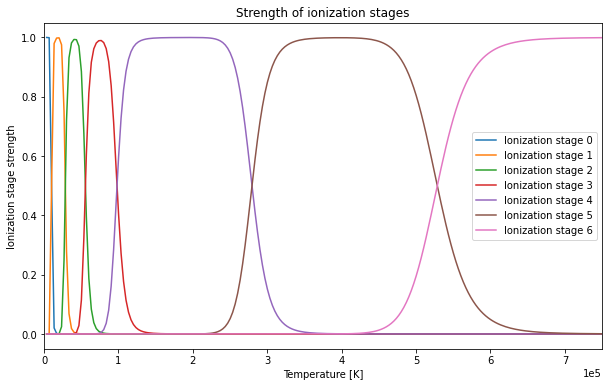

In [26]:
c_atom_extended = Atom('C_I-VII.txt')
temperatures = np.linspace(3500, 1e7, 3000) * units.K
pressure = 1 * units.kPa
# We compute the population for each temperature, in each stage and for each level
pops = c_atom_extended.compute_populations(temperatures, pressure) # shape (7, 401, 1000)

# We then find the total population in each stage for each temperature
total_populations = np.nansum(pops, axis=1)

plt.figure(figsize=(10,6))
for i in range(7):
    plt.plot(temperatures, total_populations[i, :], label=f"Ionization stage {i}") # maybe plot for i+1 so it makes more sense?

plt.legend()
plt.title("Strength of ionization stages")
plt.xlabel('Temperature [K]')
plt.ylabel('Ionization stage strength')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlim(0, 0.75e6);

We see here as we saw in the payne plots that as the temperature increases we get more ionized atoms. We see that for the lowest temperature neutral carbon is strongest, but as the temperature increases, the singly ionized stage becomes the strongest one, then the doubly ionized stage etc. We see that as carbon becomes more ionized the ionization stages excist for a larger temperature range before the strength decreases and the next stage becomes stronger.

## Comparison of the ionisation fractions under CIE with the Saha

In diffuse media where densities are much lower, collisions are much less frequent and the Saha ionisation no longer applies. In these conditions, it is common to use the *Collisional Ionisation Equilibrium* (CIE), also called *coronal equilibrium* since it is a good approximation for the coronae of stars. The provided file `C_CIE.txt` contains the ionisation fractions of carbon (up to C VII) as a function of temperature. We would now like to compare the ionisation fractions under CIE with the Saha (previous point) and discuss the differences.

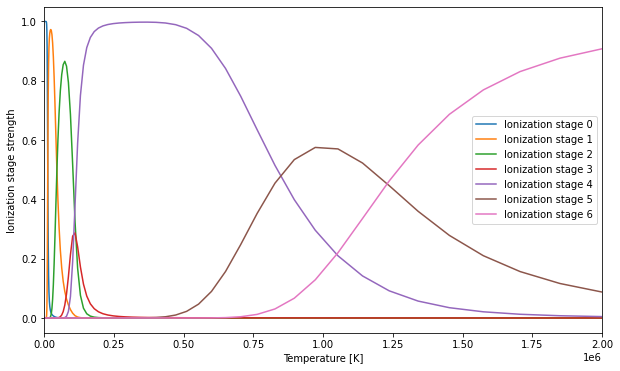

In [23]:
# Retrieving data from C_CIE.txt-file:
data = np.loadtxt("C_CIE.txt", skiprows=2)
temp = data[:, 0]
strength = data[:, 1:]

plt.figure(figsize=(10,6))
for i in range(7):
    plt.plot(temp, strength[:, i], label=f"Ionization stage {i}")

plt.legend()
plt.title("")
plt.xlabel('Temperature [K]')
plt.ylabel('Ionization stage strength')
plt.xlim(0, 2e6);

We first notice that both approximations cause higher ionization stages to be stronger for higher temperatures. We also see that when using the Saha approximation we mostly have one and one ionization stage dominating with maximum strength = 1, in a sequential order and an even/smooth transition between two stages. The reason for this being that thermal equilibrium is assumed (such that there is a balance between ionization and recombination???). The transitions between the stages with CIE approximation is on the other hand not as even and smooth and the ionization strength is shared between several stages such that they combined have strength = 1. The reason for the distribution we see for the CIE approximation is due to ...

### Answer to: which approximation is best on the surface of the Sun?

If the question refers to the photosphere of the Sun then the Saha approximation would be best because the plasma is denser in this part of the Sun and we can use the approximation of LTE (local thermodynamic equilibrium). As mentioned, the CIE is a better approximation for low-density media and is a better approximation than the Saha approximation for the solar corona. In the solar corona we can no longer use the approximation of LTE and need a more detailed statistical calculation of the rates of collisions and recombinations. This is given by the CIE approximation. SHOULD EXPLAIN MORE?

## Under Collisional Ionisation Equilibrium, a bound-free transition can cool a gas, but the same is not true under Saha ionisation. Why is this? Discuss

Saha ionisation is valid in thermal equilibrum (TE), where all processes are in microscopic equilibrium with the reverse process. Bound-free transitions cause cooling of gas by kinetic energy being converted to a photon. WILL WRITE MORE.